### **PRINCIPAL COMPONENT ANALYSIS (PCA)**

#### Disadvantages:
- TOO NOISE IN DATASET
- DIFFICULT TO VISAULISSE
- HARD TO COMPUTATION
- VARIABILITY OF DATA IS LOW
- DISTANCE BASED MODEL WILL NOT WORK 
- IT IS NOT FEASIBILE TO USE COMPLEX MODEL FOR HIGH DIMENSIONAL DATA
- IT IS SENSITIVE TOWARDS OUTLIERS

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("all_data.csv")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Label
0,-0.000133,0.000262,0.001099,0.001834,0.002109,0.002223,0.002233,0.002036,0.001582,0.000969,...,0.82953,2.9079,3.7557,1.3344,0.74247,0.22507,0.56249,1.5705,0.79906,0
1,-0.000842,-0.001011,-0.001071,-0.000944,-0.000794,-0.000610,-0.000445,-0.000173,0.000077,0.000285,...,0.84335,3.0110,3.9877,1.2461,0.74423,0.22567,0.61034,1.6645,0.74574,0
2,-0.000766,-0.000535,0.000162,0.000898,0.001287,0.001582,0.001704,0.001659,0.001574,0.001438,...,0.87413,3.0613,3.9749,1.1560,0.52508,0.19934,0.45707,1.3386,0.74574,0
3,-0.000301,-0.000377,-0.000451,-0.000529,-0.000685,-0.000845,-0.000899,-0.000822,-0.000550,-0.000182,...,0.85467,3.3337,3.9205,1.3341,0.46024,0.20031,0.45924,1.7969,0.32451,0
4,-0.000589,-0.000857,-0.001135,-0.001171,-0.001128,-0.001039,-0.000959,-0.000937,-0.000916,-0.000819,...,0.82978,3.5814,3.7667,1.1151,0.44572,0.20538,0.41882,1.4422,0.32451,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,-0.000978,-0.001481,-0.002011,-0.001986,-0.001594,-0.001217,-0.000997,-0.000547,0.000031,0.000534,...,0.84507,3.0606,3.8405,1.3064,1.80800,0.72727,0.81104,2.5046,2.73800,1
226,-0.001599,-0.001084,0.000465,0.002076,0.002883,0.003667,0.004457,0.005221,0.005871,0.006257,...,0.84004,2.8913,3.7049,1.2511,1.41830,0.64878,0.82323,2.3979,2.35770,1
227,-0.000511,-0.001370,-0.002769,-0.003582,-0.003714,-0.003721,-0.003621,-0.003399,-0.003106,-0.002629,...,0.82726,3.2587,3.5905,1.2684,1.56390,0.66174,0.83218,2.4844,2.33220,1
228,-0.000880,-0.001734,-0.003095,-0.003891,-0.004015,-0.003949,-0.003827,-0.003839,-0.003775,-0.003182,...,0.84793,2.9933,3.9598,1.3825,1.59220,0.76657,0.80723,2.5448,2.67160,1


In [13]:
df.shape

(230, 537)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Columns: 537 entries, Unnamed: 0 to Label
dtypes: float64(536), int64(1)
memory usage: 965.1 KB


In [17]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Label
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,-0.000450,-0.000537,-0.000542,-0.000417,-0.000302,-0.000170,-0.000037,0.000106,0.000245,0.000386,...,0.819352,2.938924,3.653258,1.273790,1.352274,0.555809,0.732155,2.257363,2.059283,0.500000
std,0.001384,0.002011,0.003154,0.003986,0.004287,0.004390,0.004398,0.004345,0.004188,0.003843,...,0.038490,0.370594,0.288674,0.097245,0.380520,0.203178,0.131298,0.422864,0.755169,0.501091
min,-0.004177,-0.005409,-0.006209,-0.006735,-0.007215,-0.007269,-0.007207,-0.006973,-0.006872,-0.007872,...,0.625560,2.029600,2.730500,0.976600,0.366410,0.190470,0.370820,1.043800,0.324510,0.000000
25%,-0.001160,-0.001518,-0.002534,-0.003125,-0.003293,-0.003024,-0.003123,-0.003025,-0.002653,-0.002091,...,0.800610,2.685950,3.500250,1.205475,1.136700,0.386217,0.670595,2.074500,1.584000,0.000000
50%,-0.000793,-0.000933,-0.001141,-0.001402,-0.001455,-0.001362,-0.001301,-0.001233,-0.000990,-0.000699,...,0.828050,2.974600,3.704900,1.280400,1.494050,0.626250,0.784095,2.374000,2.339200,0.500000
75%,-0.000309,-0.000405,0.000426,0.001461,0.001823,0.002050,0.002232,0.002437,0.002413,0.002085,...,0.845147,3.255175,3.864650,1.340225,1.635325,0.732407,0.824523,2.564900,2.664500,1.000000
max,0.006799,0.008477,0.010620,0.013078,0.013870,0.013917,0.013374,0.013197,0.013135,0.012108,...,0.893140,3.796500,4.289600,1.514100,1.956000,0.834510,0.898160,2.991500,2.991500,1.000000


In [19]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2      0
Unnamed: 3      0
Unnamed: 4      0
               ..
Unnamed: 532    0
Unnamed: 533    0
Unnamed: 534    0
Unnamed: 535    0
Label           0
Length: 537, dtype: int64

In [21]:
df[df.duplicated()]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 527,Unnamed: 528,Unnamed: 529,Unnamed: 530,Unnamed: 531,Unnamed: 532,Unnamed: 533,Unnamed: 534,Unnamed: 535,Label
19,-0.000890,-0.001530,-0.002412,-0.002752,-0.002583,-0.002281,-0.002045,-0.001764,-0.001359,-0.000745,...,0.81261,2.7163,3.6046,1.1870,1.02580,0.35099,0.57239,2.0742,1.8550,0
55,-0.001105,-0.002448,-0.004618,-0.006002,-0.006409,-0.006516,-0.006420,-0.006066,-0.005442,-0.004385,...,0.81628,2.4586,3.6847,1.3265,0.97047,0.32495,0.71241,2.2141,1.2255,0
70,-0.001259,-0.000857,0.000312,0.001461,0.001899,0.002237,0.002682,0.003293,0.003946,0.004533,...,0.74218,2.2738,3.2112,1.2535,1.53760,0.80120,0.80746,2.5780,2.6645,0
114,-0.001290,-0.002273,-0.003663,-0.004351,-0.004395,-0.004152,-0.003805,-0.003337,-0.002671,-0.001742,...,0.79583,2.5271,3.2003,1.3580,1.31890,0.47072,0.75511,2.5552,1.8305,0
229,-0.001599,-0.001084,0.000465,0.002076,0.002883,0.003667,0.004457,0.005221,0.005871,0.006257,...,0.84004,2.8913,3.7049,1.2511,1.41830,0.64878,0.82323,2.3979,2.3577,1


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [35]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 2.29621042e-01,  3.98119901e-01,  5.21578486e-01, ...,
        -1.29502914e+00, -1.62785454e+00, -1.67243611e+00],
       [-2.83355881e-01, -2.36089643e-01, -1.68009699e-01, ...,
        -9.29797182e-01, -1.40507589e+00, -1.74319684e+00],
       [-2.28556193e-01,  1.01335715e-03,  2.23596945e-01, ...,
        -2.09968439e+00, -2.17745422e+00, -1.74319684e+00],
       ...,
       [-4.41457202e-02, -4.14912151e-01, -7.07572730e-01, ...,
         7.63474684e-01,  5.38075365e-01,  3.62187028e-01],
       [-3.11229946e-01, -5.96225916e-01, -8.11360519e-01, ...,
         5.73035029e-01,  6.81222500e-01,  8.12603229e-01],
       [-8.31577206e-01, -2.72611487e-01,  3.19888242e-01, ...,
         6.95160659e-01,  3.33071604e-01,  3.96027963e-01]])

In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
225    1
226    1
227    1
228    1
229    1
Name: Label, Length: 230, dtype: int64

In [41]:
pca = PCA()
X_pca = pca.fit_transform(X)
X_pca.shape

(230, 230)

In [43]:
y.shape

(230,)

In [45]:
y.value_counts()

Label
0    115
1    115
Name: count, dtype: int64

In [47]:
pca.explained_variance_.shape

(230,)

In [91]:
pca.explained_variance_ratio_

array([6.85202672e-02, 6.39270387e-02, 6.02687925e-02, 5.43278503e-02,
       5.38248309e-02, 4.99810249e-02, 4.58170029e-02, 4.48339616e-02,
       4.19192313e-02, 4.15603739e-02, 3.82024679e-02, 3.54236815e-02,
       3.38819746e-02, 3.18328379e-02, 2.91558131e-02, 2.85407475e-02,
       2.64134531e-02, 2.46894521e-02, 2.29820386e-02, 2.16343100e-02,
       1.98389747e-02, 1.74566050e-02, 1.70494460e-02, 1.44605083e-02,
       1.35572753e-02, 1.16989162e-02, 1.10699272e-02, 9.28813507e-03,
       8.16774254e-03, 6.34630718e-03, 5.67944575e-03, 5.28804112e-03,
       3.62962158e-03, 3.11927067e-03, 2.66093657e-03, 2.26039993e-03,
       2.03786168e-03, 1.95934278e-03, 1.75312724e-03, 1.63843619e-03,
       1.62443249e-03, 1.44658937e-03, 1.32358847e-03, 1.22950502e-03,
       1.17959030e-03, 1.15634846e-03, 1.02377998e-03, 9.56065632e-04,
       8.96138253e-04, 8.18729112e-04, 7.83848661e-04, 7.37905023e-04,
       6.96458800e-04, 6.56353437e-04, 6.33812415e-04, 5.87538130e-04,
      

In [51]:
explained_variance_ratio= np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio

array([0.06852027, 0.13244731, 0.1927161 , 0.24704395, 0.30086878,
       0.3508498 , 0.39666681, 0.44150077, 0.48342   , 0.52498037,
       0.56318284, 0.59860652, 0.6324885 , 0.66432134, 0.69347715,
       0.7220179 , 0.74843135, 0.7731208 , 0.79610284, 0.81773715,
       0.83757613, 0.85503273, 0.87208218, 0.88654268, 0.90009996,
       0.91179888, 0.9228688 , 0.93215694, 0.94032468, 0.94667099,
       0.95235043, 0.95763847, 0.9612681 , 0.96438737, 0.9670483 ,
       0.9693087 , 0.97134657, 0.97330591, 0.97505904, 0.97669747,
       0.9783219 , 0.97976849, 0.98109208, 0.98232159, 0.98350118,
       0.98465753, 0.98568131, 0.98663737, 0.98753351, 0.98835224,
       0.98913609, 0.98987399, 0.99057045, 0.9912268 , 0.99186062,
       0.99244816, 0.99296074, 0.99345929, 0.99390731, 0.99434327,
       0.99474986, 0.99514837, 0.99551226, 0.99585939, 0.99618106,
       0.99645628, 0.99670669, 0.9969478 , 0.99717981, 0.99737701,
       0.99756547, 0.99774408, 0.99791395, 0.99805981, 0.99819

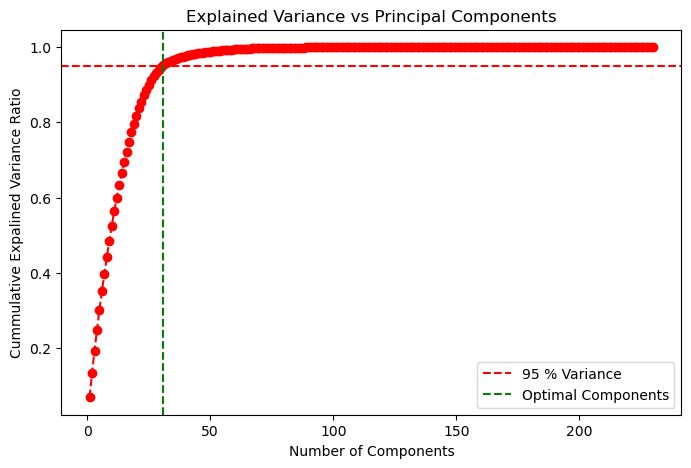

In [63]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Expalined Variance Ratio")
plt.title("Explained Variance vs Principal Components")
plt.axhline(y=0.95, color = 'r', linestyle='--', label= "95 % Variance")
plt.axvline(x = np.argmax(explained_variance_ratio>0.95)+1, color='g', linestyle='--', label="Optimal Components")
plt.legend()
plt.show()

In [65]:
optimal_components = np.argmax(explained_variance_ratio>0.95)+1

In [81]:
pca_optimal = PCA(n_components = optimal_components)
X_optimal = pca_optimal.fit_transform(X)
X_optimal

array([[-1.37484324, -8.06396774, -2.00767939, ..., -2.107849  ,
         1.81404332,  1.34595724],
       [-0.68015066,  1.45860682, -2.34297315, ..., -2.3943755 ,
         0.29345203,  1.98185994],
       [-1.74775973, -6.87433992, -2.79116147, ...,  0.71077076,
         1.00889831,  1.19868209],
       ...,
       [ 8.1895132 ,  0.42605088,  4.24981207, ..., -0.81146592,
        -1.95938508, -1.0062493 ],
       [ 0.28160309,  5.23910174, -0.39304254, ..., -3.90796987,
         0.06658615,  2.54266012],
       [ 1.4035466 ,  3.5302492 ,  3.2274924 , ..., -1.94512211,
         0.82665051,  0.29277196]])

In [85]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_optimal, y)
y_pred_train = lr.predict(X_optimal)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_train, y)

array([[115,   0],
       [  0, 115]], dtype=int64)